## NumPy进阶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### NumPy中的函数

#### 通用一元函数

In [3]:
# inf - infinity
# nan - not a number
array1 = np.array([1, 2, 3, np.inf, np.nan, -np.inf, np.nan, 5])
array1

array([  1.,   2.,   3.,  inf,  nan, -inf,  nan,   5.])

In [4]:
array1.dtype

dtype('float64')

In [5]:
np.isnan(array1)

array([False, False, False, False,  True, False,  True, False])

In [6]:
array1[~np.isnan(array1)]

array([  1.,   2.,   3.,  inf, -inf,   5.])

In [7]:
np.isfinite(array1)

array([ True,  True,  True, False, False, False, False,  True])

In [8]:
array1[np.isfinite(array1)]

array([1., 2., 3., 5.])

In [9]:
x = np.linspace(0.5, 10, 72)
y1 = np.sin(x)
y2 = np.log2(x)
y3 = np.sqrt(x)

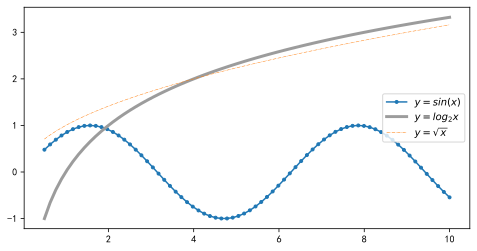

In [10]:
# 定制画布
plt.figure(figsize=(8, 4))
# 绘制折线图
plt.plot(x, y1, marker='.',  label='$y=sin(x)$')
plt.plot(x, y2, label='$y=log_{2}x$', linewidth=3, color='#9c9c9c')
plt.plot(x, y3, label='$y=\sqrt{x}$', linestyle='-.', linewidth=0.5)
# 显示图例
plt.legend(loc='center right')
# 显示图表
plt.show()

#### 通用二元函数

In [11]:
array2 = np.array([0.1 + 0.2, 0.1 + 0.2 + 0.3])
array3 = np.array([0.3, 0.6])

In [12]:
array2 == array3

array([False, False])

In [13]:
np.all(array2 == array3)

np.False_

In [14]:
# 比较两个数组元素是否（几乎）完全相等 - 有误差容忍度
np.allclose(array2, array3)

True

In [15]:
array4 = np.array([1, 2, 3, 4, 5, 6])
array5 = np.array([2, 4, 6, 8, 10])

In [16]:
# 交集
np.intersect1d(array4, array5)

array([2, 4, 6])

In [17]:
# 并集
np.union1d(array4, array5)

array([ 1,  2,  3,  4,  5,  6,  8, 10])

In [18]:
# 差集
np.setdiff1d(array4, array5)

array([1, 3, 5])

In [19]:
# 对称差
np.setxor1d(array4, array5)

array([ 1,  3,  5,  8, 10])

In [20]:
# 成员运算
# np.in1d(array4, array5)
np.isin(array4, array5)

array([False,  True, False,  True, False,  True])

In [21]:
# 杰卡德相似度
user_a = np.array(['平板电脑', '尿不湿', '手机', '键盘', '手机支架', '奶瓶', '婴儿辅食', '基围虾', '巴沙鱼', '生抽', '沙拉酱'])
user_b = np.array(['平板电脑', '键盘', '充电宝', '补光灯', '生抽', '散热器', '笔记本电脑', '双肩包', '登山杖', '露营帐篷', '睡袋'])
user_c = np.array(['沐浴露', '维C泡腾片', '牛奶', '尿不湿', '平板电脑', '奶瓶', '婴儿辅食', '手机', '磨牙棒', '生抽', '基围虾'])

In [22]:
np.intersect1d(user_a, user_b).size / np.union1d(user_a, user_b).size

0.15789473684210525

In [23]:
np.intersect1d(user_a, user_c).size / np.union1d(user_a, user_c).size

0.4666666666666667

In [24]:
np.setdiff1d(user_a, user_c)

array(['巴沙鱼', '手机支架', '沙拉酱', '键盘'], dtype='<U4')

In [25]:
np.setdiff1d(user_c, user_a)

array(['沐浴露', '牛奶', '磨牙棒', '维C泡腾片'], dtype='<U5')

In [26]:
# 余弦相似度
user = np.array([5, 1, 3])
mov1 = np.array([4, 5, 1])
mov2 = np.array([5, 1, 5])

In [27]:
# linear algebra
# np.dot - 点积
# np.linalg.norm - 模长
np.dot(user, mov1) / (np.linalg.norm(user) * np.linalg.norm(mov1))

np.float64(0.7302967433402215)

In [28]:
# np.arcos - 反余弦函数 - 弧度
# np.degrees - 弧度换算角度
np.degrees(np.arccos(np.dot(user, mov1) / (np.linalg.norm(user) * np.linalg.norm(mov1))))

np.float64(43.08872313536282)

In [29]:
np.degrees(np.arccos(np.dot(user, mov2) / (np.linalg.norm(user) * np.linalg.norm(mov2))))

np.float64(13.967881205170064)

#### 其他常用函数

In [30]:
array6 = np.array([1, 2, 3, 1, 1, 2, 2, 4, 5, 7, 3, 6, 6])
array6

array([1, 2, 3, 1, 1, 2, 2, 4, 5, 7, 3, 6, 6])

In [31]:
# 去重
array7 = np.unique(array6)
array7

array([1, 2, 3, 4, 5, 6, 7])

In [32]:
array8 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
array9 = np.array([[4, 4, 4], [5, 5, 5], [6, 6, 6]])

In [33]:
# 在0轴方向（垂直）堆叠 - vertical
array10 = np.vstack((array8, array9))
array10

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [34]:
# 在1轴的方向堆叠 - horizontal
np.hstack((array8, array9))

array([[1, 1, 1, 4, 4, 4],
       [2, 2, 2, 5, 5, 5],
       [3, 3, 3, 6, 6, 6]])

In [35]:
# 数组的拼接
np.concatenate((array8, array9), axis=1)

array([[1, 1, 1, 4, 4, 4],
       [2, 2, 2, 5, 5, 5],
       [3, 3, 3, 6, 6, 6]])

In [36]:
# 堆叠出更高维的数组
np.stack((array8, array9), axis=0)

array([[[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]])

In [37]:
np.stack((array8, array9), axis=1)

array([[[1, 1, 1],
        [4, 4, 4]],

       [[2, 2, 2],
        [5, 5, 5]],

       [[3, 3, 3],
        [6, 6, 6]]])

In [38]:
# 将一个数组拆分成多个数组
np.vsplit(array10, 3)

[array([[1, 1, 1],
        [2, 2, 2]]),
 array([[3, 3, 3],
        [4, 4, 4]]),
 array([[5, 5, 5],
        [6, 6, 6]])]

In [39]:
# 追加元素
np.append(array6, [10, 11, 12])

array([ 1,  2,  3,  1,  1,  2,  2,  4,  5,  7,  3,  6,  6, 10, 11, 12])

In [40]:
# 插入元素
np.insert(array6, 1, [10, 20])

array([ 1, 10, 20,  2,  3,  1,  1,  2,  2,  4,  5,  7,  3,  6,  6])

In [41]:
array11 = np.random.randint(1, 100, 10)
array11

array([98, 76,  9,  6, 90, 21, 93, 87, 98, 32], dtype=int32)

In [42]:
# 抽取元素 - 相当于布尔索引的作用
np.extract(array11 < 50, array11)

array([ 9,  6, 21, 32], dtype=int32)

In [43]:
# 给出一组条件和对应的处理数据的表达式，满足条件就执行对应的表达式，不满足条件取默认值
np.select([array11 < 30, array11 > 50], [array11 * 10, array11 // 10], default=100)

array([  9,   7,  90,  60,   9, 210,   9,   8,   9, 100], dtype=int32)

In [44]:
# 给出一个条件和两个表达式，满足条件执行表达式1，不满足条件执行表达式2
np.where(array11 < 50, array11 * 10, array11 // 10)

array([  9,   7,  90,  60,   9, 210,   9,   8,   9, 320], dtype=int32)

In [45]:
array11

array([98, 76,  9,  6, 90, 21, 93, 87, 98, 32], dtype=int32)

In [46]:
# 滚动数组元素
np.roll(array11, 2)

array([98, 32, 98, 76,  9,  6, 90, 21, 93, 87], dtype=int32)

In [47]:
np.roll(array11, -2)

array([ 9,  6, 90, 21, 93, 87, 98, 32, 98, 76], dtype=int32)

In [48]:
np.roll(array10, 2)

array([[6, 6, 1],
       [1, 1, 2],
       [2, 2, 3],
       [3, 3, 4],
       [4, 4, 5],
       [5, 5, 6]])

In [49]:
np.roll(array10, 2, axis=0)

array([[5, 5, 5],
       [6, 6, 6],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [50]:
array12 = np.arange(1, 10).reshape((3, 3))
array12

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
np.roll(array12, 2, axis=0)

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

In [52]:
np.roll(array12, 1, axis=1)

array([[3, 1, 2],
       [6, 4, 5],
       [9, 7, 8]])

In [53]:
# 替换数组元素
np.put(array11, [1, 3, 5, 7], [33, 88])
array11

array([98, 33,  9, 88, 90, 33, 93, 88, 98, 32], dtype=int32)

In [54]:
np.place(array11, array11 > 50, [44, 99])
array11

array([44, 33,  9, 99, 44, 33, 99, 44, 99, 32], dtype=int32)

In [55]:
guido_image = plt.imread('res/guido.jpg')
guido_image.shape

(750, 500, 3)

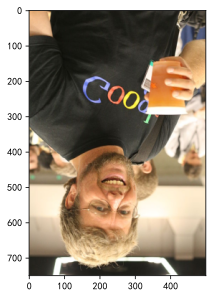

In [56]:
plt.imshow(np.flip(guido_image, axis=0))

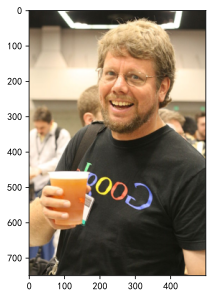

In [57]:
plt.imshow(np.flip(guido_image, axis=1))

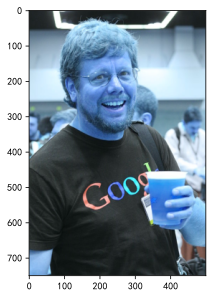

In [58]:
plt.imshow(np.flip(guido_image, axis=2))

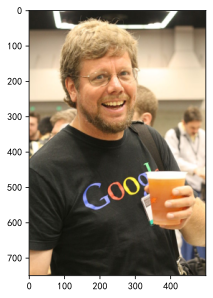

In [59]:
plt.imshow(guido_image)

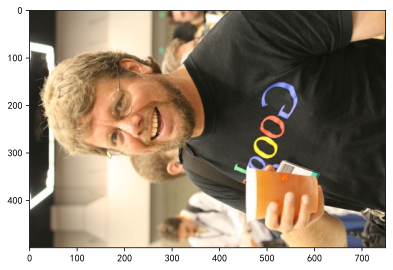

In [60]:
plt.imshow(guido_image.swapaxes(0, 1))

#### 普通函数矢量化

In [61]:
# 通过vectorize装饰器将普通函数做矢量化处理
@np.vectorize
def fac(n):
    if n == 0:
        return 1
    return n * fac(n - 1)

In [62]:
temp = np.arange(1, 9)
temp

array([1, 2, 3, 4, 5, 6, 7, 8])

In [63]:
fac(temp)

array([    1,     2,     6,    24,   120,   720,  5040, 40320])

In [64]:
x1 = np.random.randint(20, 80, 10)
x2 = np.random.randint(30, 70, 10)
x1, x2

(array([77, 49, 32, 23, 54, 72, 20, 54, 28, 50], dtype=int32),
 array([31, 40, 39, 38, 30, 54, 43, 37, 50, 68], dtype=int32))

In [65]:
from math import gcd, lcm

gcd = np.vectorize(gcd)
gcd(x1, x2)

array([ 1,  1,  1,  1,  6, 18,  1,  1,  2,  2])

In [66]:
lcm = np.vectorize(lcm)
lcm(x1, x2)

array([2387, 1960, 1248,  874,  270,  216,  860, 1998,  700, 1700])

### 广播机制

两个形状（shape属性）不一样的数组如果要做运算，要先通过广播机制使其形状一样才能运算。<br>
如果要执行广播机制使得两个数组形状一样，需要满足以下两个条件其中一个：

1. 两个数组后缘维度（shape属性从后往前看对应的部分）相同。
2. 两个数组后缘维度不同，但是其中一方为1。

In [67]:
temp1 = np.array([[0, 0, 0], [1, 1, 1], [2, 2, 2], [3, 3, 3]])
temp2 = np.array([1, 2, 3])

In [68]:
temp1 + temp2

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [69]:
temp3 = np.array([[1], [2], [3], [4]])

In [70]:
temp1 + temp3

array([[1, 1, 1],
       [3, 3, 3],
       [5, 5, 5],
       [7, 7, 7]])

In [71]:
temp4 = np.array([1 ,2, 3])
temp5 = np.array([[3], [2], [1]])

In [ ]:
temp4.shape

In [73]:
temp5.shape

(3, 1)

In [74]:
temp4 + temp5

array([[4, 5, 6],
       [3, 4, 5],
       [2, 3, 4]])

### 矩阵

In [75]:
m1 = np.array([[1, 0, 2], [-1, 3, 1]])
m2 = np.array([[3, 1], [2, 1], [1, 0]])

In [76]:
m1.shape

(2, 3)

In [77]:
m2.shape

(3, 2)

In [78]:
m1 @ m2

array([[5, 1],
       [4, 2]])

In [79]:
np.matmul(m1, m2)

array([[5, 1],
       [4, 2]])

$$
\begin{cases}
x_1 + 2x_2 + x_3 = 8 \\
3x_1 + 7x_2 + 2x_3 = 23 \\
2x_1 + 2x_2 + x_3 = 9
\end{cases}
$$

$$
\boldsymbol{A} = \begin{bmatrix}
1 & 2 & 1\\
3 & 7 & 2\\
2 & 2 & 1
\end{bmatrix}, \quad
\boldsymbol{x} = \begin{bmatrix}
x_1 \\
x_2\\
x_3
\end{bmatrix}, \quad
\boldsymbol{b} = \begin{bmatrix}
8 \\
23\\
9
\end{bmatrix}
$$

In [80]:
m3 = np.arange(1, 10, dtype='f8').reshape(3, 3)
m3[-1, -1] = 8
m3

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 8.]])

In [81]:
# 计算矩阵的秩
np.linalg.matrix_rank(m3)

3

In [82]:
# 逆矩阵 - 奇异矩阵不能求逆矩阵
# LinAlgError: Singular matrix
np.linalg.inv(m3)

array([[-2.66666667,  2.66666667, -1.        ],
       [ 3.33333333, -4.33333333,  2.        ],
       [-1.        ,  2.        , -1.        ]])

In [83]:
# 有唯一解决的条件：系数矩阵的秩等于增广矩阵的秩，同时跟未知数的个数相同。
# 秩（rank）：线性无关的行或者列的数量。
# 线性相关：一个向量可以通过其他向量做线性变换（数乘和加法）得到，那么它们就是线性相关的。

In [84]:
A = np.array([[1, 2, 1], [3, 7, 2], [2, 2, 1]])
b = np.array([8, 23, 9]).reshape(-1, 1)

In [85]:
# 系数矩阵的秩
np.linalg.matrix_rank(A)

3

In [86]:
# 增广矩阵的秩
np.linalg.matrix_rank(np.hstack((A, b)))

3

In [87]:
# 解线性方程组
np.linalg.solve(A, b)

array([[1.],
       [2.],
       [3.]])

$$
A \cdot x = b
$$
$$
A^{-1} \cdot A \cdot x = A^{-1} \cdot b
$$
$$
I \cdot x = A^{-1} \cdot b
$$
$$
x = A^{-1} \cdot b
$$

In [88]:
# 通过逆矩阵解线性方程组
np.linalg.inv(A) @ b

array([[1.],
       [2.],
       [3.]])

#### 补充 - 用scipy处理图像

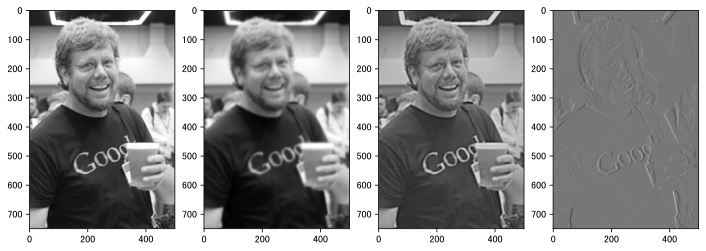

In [89]:
from scipy.ndimage import gaussian_filter, sobel

# 获取灰度图
guido_image = plt.imread('res/guido.jpg')
gray_image = np.mean(guido_image, axis=2)

plt.figure(figsize=(12, 4))

# 灰度图
plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap=plt.cm.gray)

# 模糊和锐化
plt.subplot(1, 4, 2)
blurred_image = gaussian_filter(gray_image, 3)
plt.imshow(blurred_image, cmap=plt.cm.gray)

plt.subplot(1, 4, 3)
filtered_image = gaussian_filter(blurred_image, 1)
sharpen_image = blurred_image + 32 * (blurred_image - filtered_image)
plt.imshow(sharpen_image, cmap=plt.cm.gray)

# 边缘图
plt.subplot(1, 4, 4)
# 使用索贝尔算子（邻点灰度加权差）进行边缘检测
edge_image = sobel(gray_image)
plt.imshow(edge_image, cmap=plt.cm.gray)

plt.show()

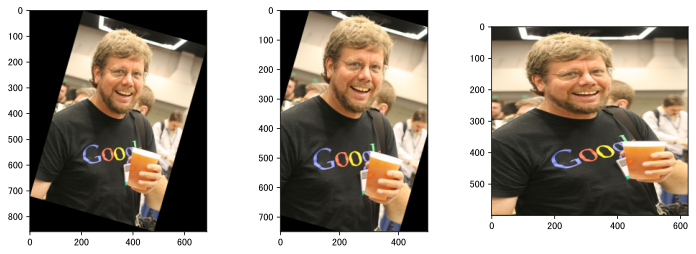

In [90]:
from scipy.ndimage import rotate, zoom

plt.figure(figsize=(12, 4))

# 旋转
plt.subplot(1, 3, 1)
rotated_image = rotate(guido_image, -16, reshape=True)
plt.imshow(rotated_image)

# 旋转
plt.subplot(1, 3, 2)
rotated_image = rotate(guido_image, -16, reshape=False)
plt.imshow(rotated_image)

# 缩放
plt.subplot(1, 3, 3)
scaled_image = zoom(guido_image, zoom=(0.8, 1.25, 1))
plt.imshow(scaled_image)

plt.show()

### 多项式

In [91]:
# NumPy老版本用poly1d表示多项式
p1 = np.poly1d([3, 0, 2, 1])
p2 = np.poly1d([1, 2, 3])
print(p1)
print(p2)

   3
3 x + 2 x + 1
   2
1 x + 2 x + 3


In [92]:
# 多项式加法
print(p1 + p2)

   3     2
3 x + 1 x + 4 x + 4


In [93]:
# 多项式乘法
print(p1 * p2)

   5     4      3     2
3 x + 6 x + 11 x + 5 x + 8 x + 3


In [94]:
# 令x=2，计算多项式的值
p2(2)

11

In [95]:
# 求导
print(p1.deriv())

   2
9 x + 2


In [96]:
# 求不定积分
print(p1.integ())

      4     2
0.75 x + 1 x + 1 x


In [97]:
p3 = np.poly1d([1, 3, 2])
print(p3)
# 令多项式等于0，求解x
print(p3.roots)

   2
1 x + 3 x + 2
[-2. -1.]


In [98]:
type(p3)

numpy.poly1d

In [99]:
from numpy.polynomial import Polynomial

# NumPy新版本用Polynomial表示多项式
p1 = Polynomial([1, 2, 0, 3])
print(p1)

1.0 + 2.0·x + 0.0·x² + 3.0·x³


In [100]:
print(p1.deriv())

2.0 + 0.0·x + 9.0·x²


In [101]:
print(p1.integ())

0.0 + 1.0·x + 1.0·x² + 0.0·x³ + 0.75·x⁴


In [102]:
# 最高次项
p1.degree()

3

### 最小二乘解

In [103]:
# 每月收入
x = np.array([3200, 4811, 5386, 5564, 6120, 6691, 6906, 7483, 7587, 7890,
              8090, 8300, 8650, 8835, 8975, 9070, 9100, 9184, 9247, 9313, 
              9465, 9558, 9853, 9938, 10020, 10242, 10343, 10731, 10885, 10990, 
              11100, 11227, 11313, 11414, 11630, 11806, 11999, 12038, 12400, 12547, 
              12890, 13050, 13360, 13850, 14890, 14990, 15500, 16899, 17010, 19880])
# 每月网购支出
y = np.array([1761, 882, 1106, 182, 1532, 1978, 2174, 2117, 2134, 1924, 
              2207, 2876, 2617, 2683, 3054, 3277, 3345, 3462, 3401, 3591,
              3596, 3671, 3829, 3907, 3852, 4288, 4359, 4099, 4300, 4367,
              5019, 4873, 4674, 5174, 4666, 5797, 5782, 5451, 5487, 5448,
              6002, 6439, 6309, 6045, 5935, 6928, 7356, 6682, 6672, 6582])

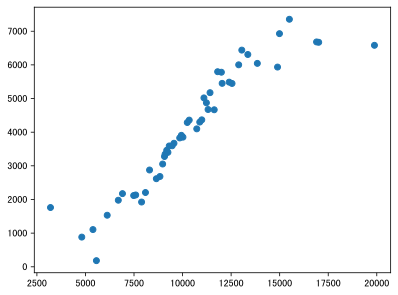

In [104]:
# 定性分析 - 散点图
plt.scatter(x, y)
plt.show()

In [105]:
from scipy import stats

# 夏皮洛检验（正态性判定）
stats.shapiro(x), stats.shapiro(y)

(ShapiroResult(statistic=0.9830237255502384, pvalue=0.6844559821829901),
 ShapiroResult(statistic=0.9789829625124067, pvalue=0.5099101868610301))

In [106]:
# 定量分析 - 相关系数 - correlation coefficient
# 皮尔逊相关系数（标准化的协方差 - [-1, 1]）
# 1. 连续值且成对出现
# 2. 没有异常值
# 3. 来自于正态总体
np.corrcoef(x, y)

array([[1.        , 0.93422273],
       [0.93422273, 1.        ]])

In [107]:
# 计算皮尔逊相关系数
stats.pearsonr(x, y)

PearsonRResult(statistic=0.9342227278473364, pvalue=3.9566343708624996e-23)

In [108]:
history_data = {key: value for key, value in zip(x, y)}
len(history_data)

50

In [109]:
data = np.random.randint(1, 100, 15).tolist()
data

[67, 88, 28, 95, 96, 10, 70, 80, 84, 8, 19, 68, 1, 90, 39]

In [110]:
import heapq

# 通过堆（heap）结构快速的找到TopN元素
print(heapq.nsmallest(3, data))
print(heapq.nlargest(5, data))

[1, 8, 10]
[96, 95, 90, 88, 84]


In [111]:
# 目标：因为月收入和网购支出之间有强相关关系，所以我们可以通过月收入预测网购支出
# 方法1：输入一个月收入，找到跟这个收入最接近的N条数据，用它们的平均值预测对应的网购支出
# KNN - k最近邻算法（找到k个最近的邻居，用这k个邻居的数据来做出预测）
import heapq


def predicate_by_knn(income, k=5):
    """KNN算法"""
    keys = heapq.nsmallest(k, history_data, key=lambda x: (x - income) ** 2)
    return np.mean([history_data[key] for key in keys]).round(2)

In [112]:
predicate_by_knn(12800)

5937.0

In [113]:
predicate_by_knn(6800)

1987.0

In [114]:
predicate_by_knn(20000, k=3)

6645.33

回归模型：
$$ Y = aX + b $$

损失函数：
$$ MSE = \frac{1} {N} \sum (\hat{y_i} - y_i)^2 $$

In [115]:
# MSE - Mean Squared Error
def get_loss(a, b):
    """损失函数"""
    y_hat = a * x + b
    return np.mean((y_hat - y) ** 2)

In [116]:
# 蒙特卡洛模拟（随机瞎蒙法）
import random

min_loss = np.inf
ba, bb = None, None

for _ in range(10000):
    a = random.random() * 0.5 + 0.5
    b = random.random() * 1000 - 2000
    curr_loss = get_loss(a, b)
    if curr_loss < min_loss:
        min_loss = curr_loss
        ba, bb = a, b
        print(min_loss)
print(ba, bb)

1120507.2896234244
808664.5200191085
443441.57239664154
408322.6807976254
394598.0903141962
394480.4982102699
394457.8332210129
393928.3764661801
393882.835806886
393829.0258808886
393817.59355663764
0.5068829877448287 -1209.315185532824


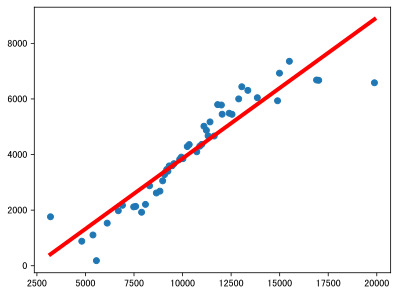

In [117]:
plt.scatter(x, y)
plt.plot(x, ba * x + bb, color='r', linewidth=4)
plt.show()

In [118]:
def predicate_by_regression(income):
    return round(ba * income + bb, 2)

In [119]:
predicate_by_regression(6800)

2237.49

In [120]:
predicate_by_regression(12800)

5278.79

将回归模型带入损失函数：
$$ f(a, b) = \frac {1} {N} \sum_{i=1}^{N}(y_i - (ax_i + b))^2 $$

如何让$f(a, b)$取到最小值？？？

求偏导数，并令其等于0。
$$ \frac {\partial {f(a, b)}} {\partial {a}} = \frac {2} {N} \sum_{i=1}^{N}(-x_iy_i + x_i^2a + x_ib) = 0 $$ 
$$ \frac {\partial {f(a, b)}} {\partial {b}} = \frac {2} {N} \sum_{i=1}^{N}(-y_i + x_ia + b) = 0 $$

求解得到：
$$a = \frac{\sum(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum(x_{i} - \bar{x})^{2}}$$
$$b = \bar{y} - a\bar{x}$$

In [121]:
x_bar, y_bar = np.mean(x), np.mean(y)

In [122]:
ba = np.dot((x - x_bar), (y - y_bar)) / np.sum((x - x_bar) ** 2)
bb = y_bar - ba * x_bar
ba, bb

(0.5079223873753402, -1227.104582703003)

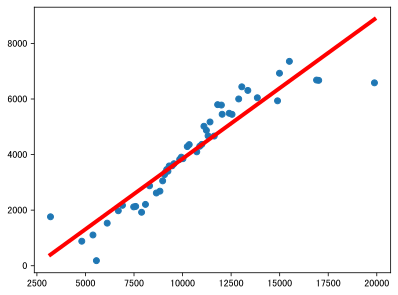

In [123]:
plt.scatter(x, y)
plt.plot(x, ba * x + bb, color='r', linewidth=4)
plt.show()

In [124]:
# 拟合出一个线性回归模型
np.polyfit(x, y, deg=1)

array([ 5.07922387e-01, -1.22710458e+03])

In [125]:
# 拟合出一个多项式回归模型
a, b, c = np.polyfit(x, y, deg=2)
a, b, c

(-1.783556141649917e-05, 0.905493221908901, -3247.1511980120213)

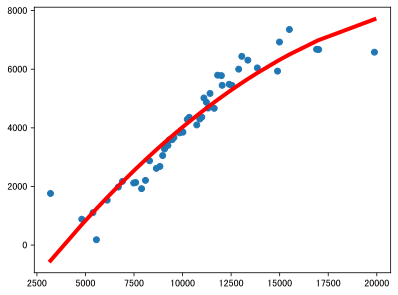

In [126]:
plt.scatter(x, y)
plt.plot(x, a * x ** 2 + b * x + c, color='r', linewidth=4)
plt.show()

In [127]:
Polynomial.fit(x, y, deg=1).convert().coef

array([-1.22710458e+03,  5.07922387e-01])